<!-- @q -->
## Problem 1 

Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns:

In [ ]:

import pandas as pd
df = pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")
cols = ["fare_amount", "tip_amount", "tolls_amount", "total_amount"]
summary_stats = df[cols].describe()
print(summary_stats)

        fare_amount    tip_amount  tolls_amount  total_amount
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      15.106313      2.634494      0.623447     22.564659
std       13.954762      3.409800      6.437507     19.209255
min      -52.000000      0.000000     -6.120000    -65.920000
25%        7.000000      0.000000      0.000000     12.375000
50%       10.000000      2.000000      0.000000     16.300000
75%       16.000000      3.250000      0.000000     22.880000
max      176.000000     43.000000    612.000000    671.800000


<!-- @q -->
## Problem 2

Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`):

In [4]:
longest_trip = df.loc[df["trip_distance"].idxmax()]
longest_trip_values = longest_trip[["fare_amount", "tip_amount", "tolls_amount", "total_amount"]]

print("Longest Trip Details:\n")
print(longest_trip_values)


Longest Trip Details:

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object


<!-- @q -->
## Problem 3 

Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [6]:
meteorite_df = pd.read_csv("data/Meteorite_Landings.csv")
meteorite_df = meteorite_df.rename(columns={"mass (g)": "mass"})
cols_to_drop = ["reclat", "reclong", "GeoLocation"]
meteorite_df = meteorite_df.drop(columns=cols_to_drop, errors="ignore")
meteorite_sorted = meteorite_df.sort_values(by="mass", ascending=False)
print(meteorite_sorted.head())


                  name     id nametype      recclass        mass   fall  \
16392             Hoba  11890    Valid     Iron, IVB  60000000.0  Found   
5373         Cape York   5262    Valid   Iron, IIIAB  58200000.0  Found   
5365   Campo del Cielo   5247    Valid  Iron, IAB-MG  50000000.0  Found   
5370     Canyon Diablo   5257    Valid  Iron, IAB-MG  30000000.0  Found   
3455           Armanty   2335    Valid    Iron, IIIE  28000000.0  Found   

                         year  
16392  01/01/1920 12:00:00 AM  
5373   01/01/1818 12:00:00 AM  
5365   12/22/1575 12:00:00 AM  
5370   01/01/1891 12:00:00 AM  
3455   01/01/1898 12:00:00 AM  


<!-- @q -->
## Problem 4

Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

**Hint 1**: Use `year.str.slice()` to grab a substring.

**Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

In [13]:
meteorite_df = pd.read_csv("data/Meteorite_Landings.csv")
meteorite_df["year"] = meteorite_df["year"].astype(str).str.slice(0, 4)
meteorite_df["year"] = pd.to_numeric(meteorite_df["year"], errors="coerce")
meteorite_df["before_1970"] = meteorite_df["year"] < 1970
meteorite_df = meteorite_df.set_index("id")
meteorite_df = meteorite_df.sort_index()
subset = meteorite_df.loc[10036:10040]
print(subset)


            name nametype         recclass  mass (g)   fall  year    reclat  \
id                                                                            
10036     Enigma    Valid               H4      94.0  Found   NaN  31.33333   
10037       Enon    Valid  Iron, ungrouped     763.0  Found   NaN  39.86667   
10038      Enshi    Valid               H5    8000.0   Fell   NaN  30.30000   
10039  Ensisheim    Valid              LL6  127000.0   Fell   NaN  47.86667   

         reclong            GeoLocation  before_1970  
id                                                    
10036  -82.31667  (31.33333, -82.31667)        False  
10037  -83.95000     (39.86667, -83.95)        False  
10038  109.50000          (30.3, 109.5)        False  
10039    7.35000       (47.86667, 7.35)        False  


**BONUS**: There's a data entry error in the `year` column. Can you find it?

In [25]:
meteorite_df = pd.read_csv("data/Meteorite_Landings.csv")
meteorite_df.columns = meteorite_df.columns.str.strip()

meteorite_df["year"] = pd.to_datetime(meteorite_df["year"], errors="coerce").dt.year
meteorite_df["year"] = meteorite_df["year"].astype("Int64")

print(meteorite_df["year"].describe())

suspicious = meteorite_df[(meteorite_df["year"].notna()) & ((meteorite_df["year"] > 2025) | (meteorite_df["year"] < 800))]
print(suspicious[["name", "year"]])


count       45404.0
mean     1992.04504
std       22.468781
min          1688.0
25%          1987.0
50%          1998.0
75%          2003.0
max          2101.0
Name: year, dtype: Float64
                        name  year
30682  Northwest Africa 7701  2101


/tmp/ipykernel_12773/3973551040.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  meteorite_df["year"] = pd.to_datetime(meteorite_df["year"], errors="coerce").dt.year


There's a meteorite that was reportedly found in the future:

In [26]:


future_meteorites = meteorite_df[meteorite_df["year"] > 2025]
print(future_meteorites[["name", "year"]])



                        name  year
30682  Northwest Africa 7701  2101


_This meteorite actually was found in 2010 (more information [here](https://www.lpi.usra.edu/meteor/metbull.php?code=57150))._

<!-- @q -->
## Problem 5

Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [27]:
taxi_df = pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")
taxi_df["tpep_dropoff_datetime"] = pd.to_datetime(taxi_df["tpep_dropoff_datetime"], errors="coerce")
taxi_df = taxi_df.set_index("tpep_dropoff_datetime")
hourly = taxi_df.resample("H")[["trip_distance", "fare_amount", "tolls_amount", "tip_amount"]].sum()
top5_hours = hourly.sort_values("tip_amount", ascending=False).head(5)

print(top5_hours)



                       trip_distance  fare_amount  tolls_amount  tip_amount
tpep_dropoff_datetime                                                      
2019-10-23 16:00:00         10676.95     67797.76        699.04    12228.64
2019-10-23 17:00:00         16052.83     70131.91       4044.04    12044.03
2019-10-23 18:00:00          3104.56     11565.56       1454.67     1907.64
2019-10-23 15:00:00            14.34       213.50          0.00       51.75
2019-10-23 19:00:00            98.59       268.00         24.48       25.74


/tmp/ipykernel_12773/1134234743.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = taxi_df.resample("H")[["trip_distance", "fare_amount", "tolls_amount", "tip_amount"]].sum()


<!-- @q -->
## Problem 6

Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

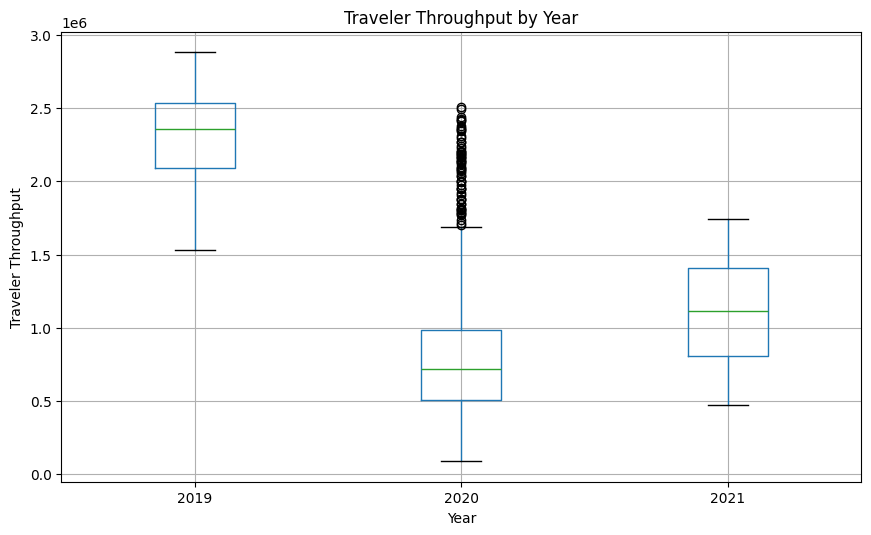

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

tsa_df = pd.read_csv("data/tsa_melted_holiday_travel.csv")

tsa_df.boxplot(column="travelers", by="year", figsize=(10,6))

plt.title("Traveler Throughput by Year")
plt.suptitle("")
plt.xlabel("Year")
plt.ylabel("Traveler Throughput")
plt.show()


<!-- @q -->
## Problem 7
Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

/tmp/ipykernel_12773/1213207705.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa_2019["Month"] = tsa_2019["date"].dt.month
/tmp/ipykernel_12773/1213207705.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa_2019["DayOfWeek"] = tsa_2019["date"].dt.day_name()


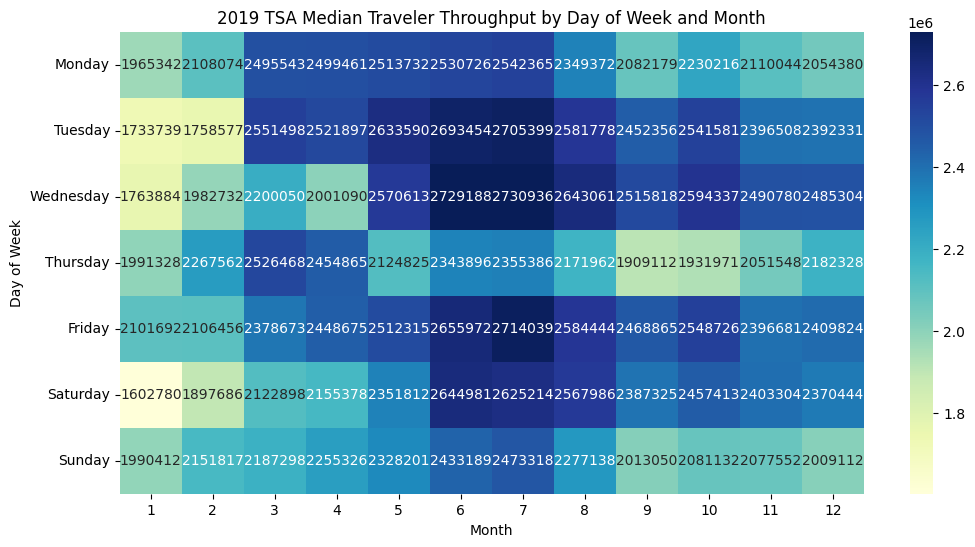

In [36]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tsa_df = pd.read_csv("data/tsa_melted_holiday_travel.csv")
tsa_df["date"] = pd.to_datetime(tsa_df["date"], errors="coerce")
tsa_2019 = tsa_df[tsa_df["year"] == 2019]
tsa_2019["Month"] = tsa_2019["date"].dt.month
tsa_2019["DayOfWeek"] = tsa_2019["date"].dt.day_name()
pivot_table = tsa_2019.pivot_table(values="travelers", index="DayOfWeek", columns="Month", aggfunc="median")
pivot_table = pivot_table.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("2019 TSA Median Traveler Throughput by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()
